## This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/googlenet/fashion_mnist/'
data_path2 = parent_path / 'Data/googlenet/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/3060_95W/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/3060_95W
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/3060_95W/Data/googlenet/cifar100


### extract data

In [4]:
batch_sizes = [64]
epochs = [10]
rounds = 1

#### read all the data from all the folders

In [5]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E10_B64_R0'] ['E10_B64_R0']
The folder list is: ['E10_B64_R0']
The common folders are: ['E10_B64_R0'] ['E10_B64_R0']


### analysis data

#### find the data in same epoch and batch size

In [16]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist/E10_B64_R0 /Users/dtjgp/Learning/GreenAI/Cloud/3060_95W/Data/googlenet/cifar100/E10_B64_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'] 
 ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [17]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [18]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0', 'S2_I1', 'S2_M2', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S3_M5', 'S4_I0', 'S4_I1', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 21


##### fashionMNIST

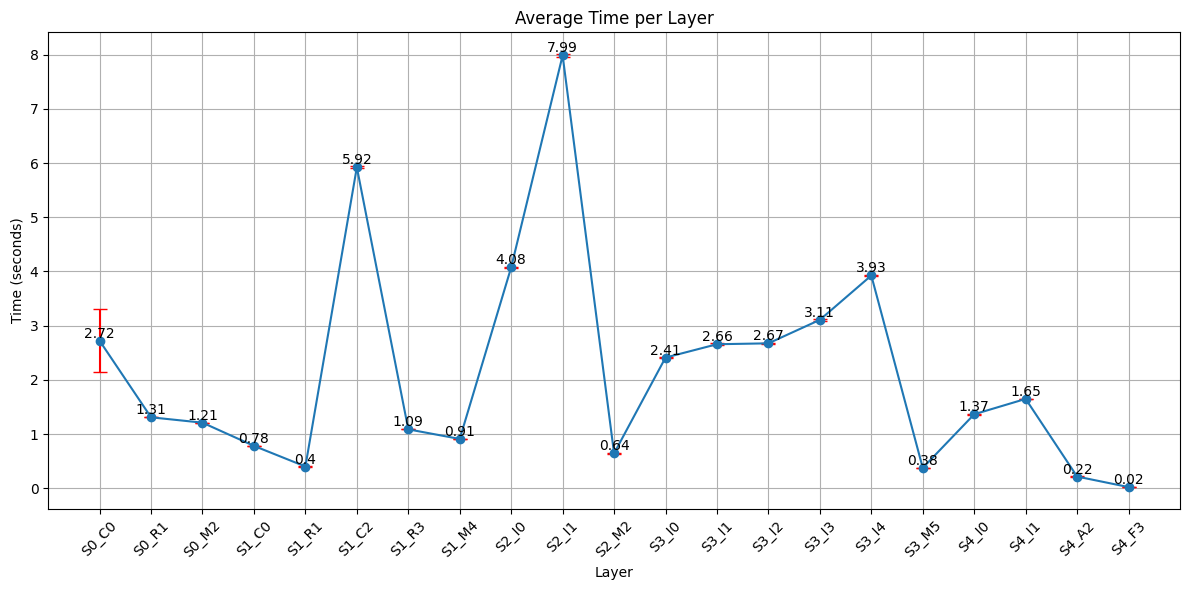

In [19]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [20]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [22]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_f[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[4.06496286 4.07973409 4.07217002 4.07273626 4.07707071 4.08540487
  4.07375884 4.0793891  4.07558107 4.07958603]
 [7.9089303  7.99364281 7.99432945 7.99651742 8.00013328 7.99416327
  7.99370885 7.99390221 7.99715447 7.98484659]
 [2.42248869 2.40777683 2.40499091 2.40846324 2.40653992 2.40501738
  2.41321683 2.41601992 2.41509414 2.42250204]
 [2.60663366 2.65936303 2.6668787  2.66161728 2.6673708  2.6695323
  2.66856861 2.66517448 2.66233516 2.65546465]
 [2.64783239 2.67725158 2.673244   2.67911744 2.6724472  2.67840147
  2.67805934 2.6776073  2.68388605 2.68054986]
 [3.07211018 3.10689187 3.11890078 3.11035228 3.11716366 3.11876583
  3.11472559 3.11335564 3.10793114 3.10260892]
 [3.89521289 3.92497277 3.92502046 3.92808628 3.92488742 3.92794299
  3.92886972 3.93097234 3.93754292 3.93772101]
 [1.34877539 1.36649299 1.37232757 1.36480427 1.36837125 1.36870646
  1.36814451 1.36968398 1.3712821  1.36693478]
 [1.63679266 1.64864707 1.64905453 1.65592551 1.65471005 1.

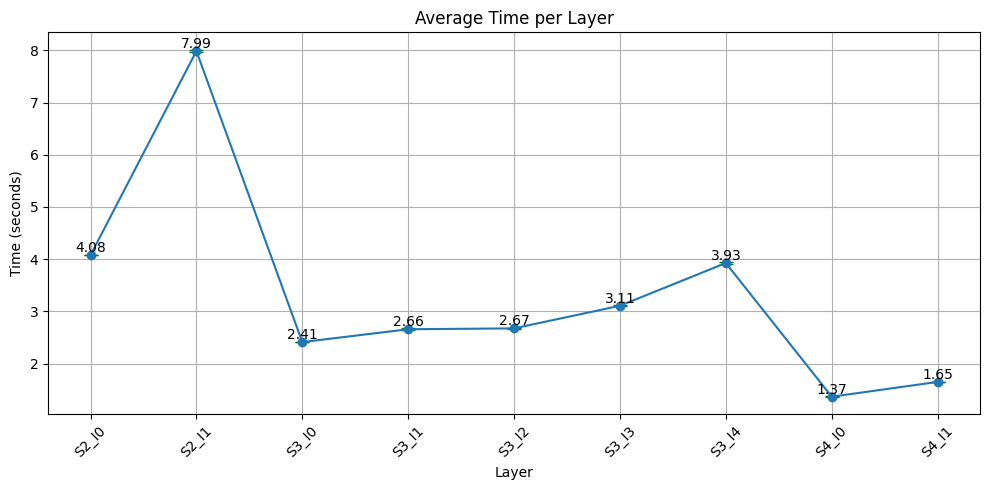

In [23]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

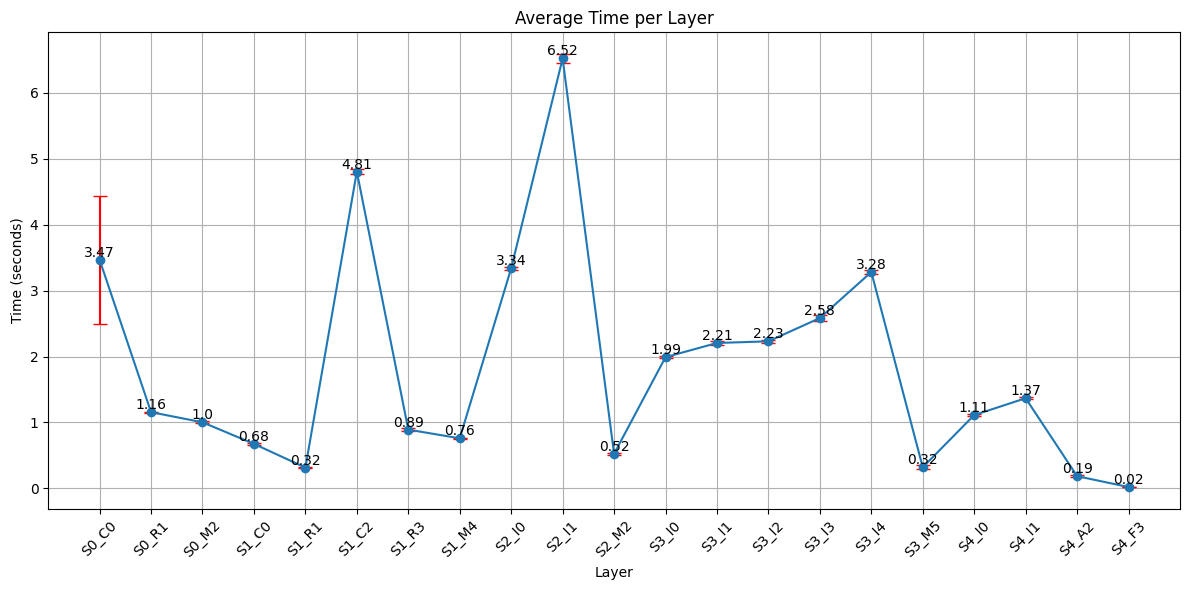

In [24]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [25]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [26]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_c[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[3.34389925 3.32960105 3.34454012 3.35547209 3.35579062 3.35725045
  3.35691667 3.35524058 3.32884359 3.26822829]
 [6.38590765 6.4750247  6.5034349  6.51315403 6.52270603 6.52407289
  6.52262068 6.53564501 6.57577085 6.67172289]
 [1.96032    1.97699165 1.98958373 1.98894691 2.00513411 1.98882866
  1.98754573 2.01147723 1.97922516 2.02317047]
 [2.15128493 2.18184137 2.19955015 2.21167302 2.2057035  2.21514916
  2.21708131 2.20376301 2.24964666 2.22661281]
 [2.19971728 2.20487309 2.2376771  2.24657559 2.25312138 2.25478101
  2.2497685  2.26300812 2.23019528 2.17444205]
 [2.49923968 2.55142474 2.56142354 2.58026338 2.58385015 2.58149934
  2.58490205 2.58536077 2.62478662 2.69224048]
 [3.23726988 3.25983739 3.29018807 3.29956651 3.30315304 3.30582881
  3.30105615 3.31287885 3.27724624 3.23812246]
 [1.09477997 1.10071445 1.1148653  1.1181736  1.11990428 1.11816907
  1.12317657 1.11677861 1.11684918 1.10194111]
 [1.3551023  1.36916757 1.37385464 1.37974262 1.37602878 1

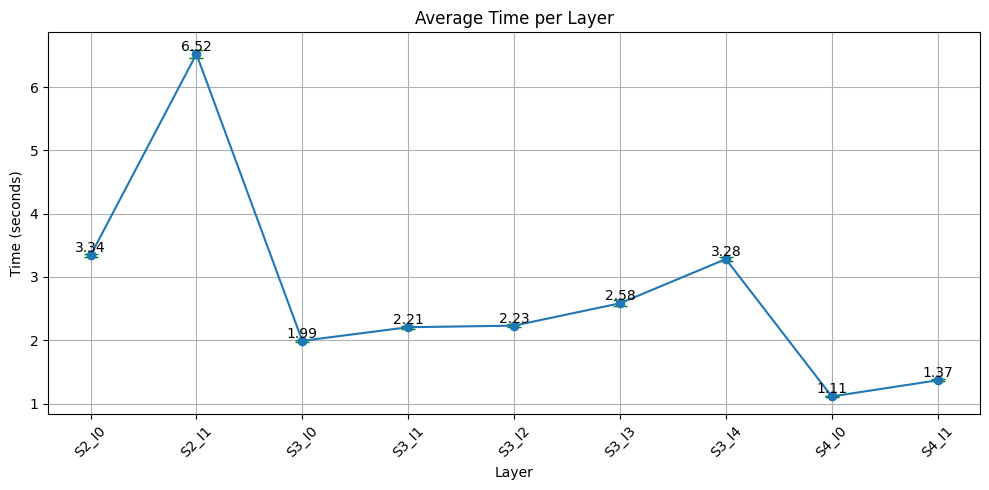

In [27]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [28]:
TrainPartName = ['TimeToDevice', 'Forward', 'Loss', 'Backward', 'Optimization', 'Test']

##### fashionMNIST

ValueError: 'x' and 'y' must have the same size

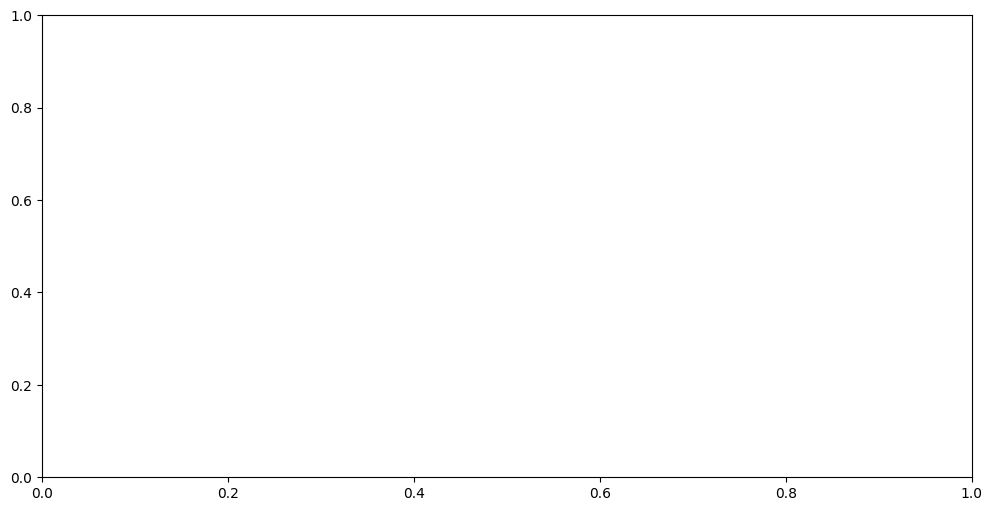

In [29]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

In [ ]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [ ]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

In [ ]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

In [ ]:
epoch_list = np.arange(1, 11)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
plt.show()

##### cifar100 

totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

In [ ]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

In [ ]:
epoch_list = np.arange(1, 11)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
plt.show()

#### EpochTime

##### fashionMNIST

In [ ]:
EpochTime_f

##### cifar100

EpochTime_c